In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns :
    df[i] = le.fit_transform(df[i])

In [6]:
y = df['Outcome']

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [7]:
x = df.iloc[:,0:8].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='softmax'))

model.compile(Adam(lr=0.0001),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 dense_5 (Dense)             (None, 7)                 77        
                                                                 
 dense_6 (Dense)             (None, 2)                 16        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=0)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5267 - accuracy: 0.3599 - val_loss: 0.4573 - val_accuracy: 0.3052
Epoch 2/100
20/20 [==============================] - 0s 781us/step - loss: 0.5262 - accuracy: 0.3599 - val_loss: 0.4568 - val_accuracy: 0.3052
Epoch 3/100
20/20 [==============================] - 0s 751us/step - loss: 0.5258 - accuracy: 0.3599 - val_loss: 0.4561 - val_accuracy: 0.3052
Epoch 4/100
20/20 [==============================] - 0s 757us/step - loss: 0.5254 - accuracy: 0.3599 - val_loss: 0.4555 - val_accuracy: 0.3052
Epoch 5/100
20/20 [==============================] - 0s 802us/step - loss: 0.5250 - accuracy: 0.3599 - val_loss: 0.4551 - val_accuracy: 0.3052
Epoch 6/100
20/20 [==============================] - 0s 805us/step - loss: 0.5246 - accuracy: 0.3599 - val_loss: 0.4548 - val_accuracy: 0.3052
Epoch 7/100
20/20 [==============================] - 0s 828us/step - loss: 0.5241 - accuracy: 0.3599 - val_loss: 0.4542 - val_accuracy: 0.3052
E

Epoch 58/100
20/20 [==============================] - 0s 831us/step - loss: 0.5078 - accuracy: 0.3599 - val_loss: 0.4388 - val_accuracy: 0.3052
Epoch 59/100
20/20 [==============================] - 0s 847us/step - loss: 0.5076 - accuracy: 0.3599 - val_loss: 0.4386 - val_accuracy: 0.3052
Epoch 60/100
20/20 [==============================] - 0s 859us/step - loss: 0.5073 - accuracy: 0.3599 - val_loss: 0.4387 - val_accuracy: 0.3052
Epoch 61/100
20/20 [==============================] - 0s 828us/step - loss: 0.5071 - accuracy: 0.3599 - val_loss: 0.4385 - val_accuracy: 0.3052
Epoch 62/100
20/20 [==============================] - 0s 807us/step - loss: 0.5069 - accuracy: 0.3599 - val_loss: 0.4380 - val_accuracy: 0.3052
Epoch 63/100
20/20 [==============================] - 0s 792us/step - loss: 0.5066 - accuracy: 0.3599 - val_loss: 0.4380 - val_accuracy: 0.3052
Epoch 64/100
20/20 [==============================] - 0s 806us/step - loss: 0.5064 - accuracy: 0.3599 - val_loss: 0.4379 - val_accuracy:

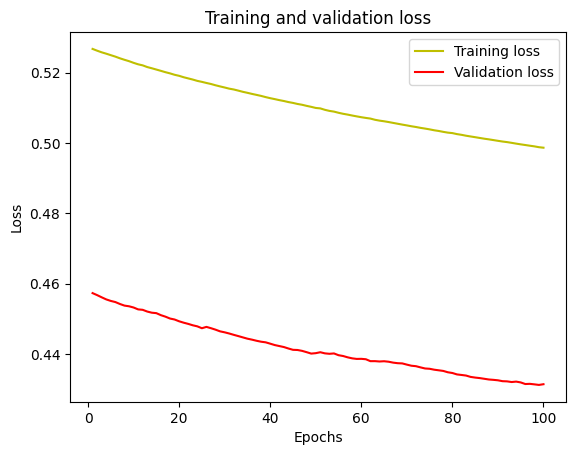

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

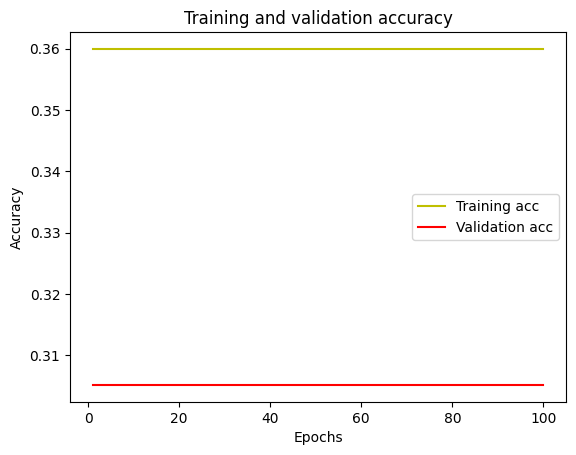

In [21]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()